# Import the necessary packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Using dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Healthcare-Diabetes.csv")

# Overviewing data

In [ ]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


 # Data Pre-processing

In [ ]:
print(df.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None 



In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


### Checking for null values

In [ ]:
df.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Using the .loc method to replace 0 values with NaN in specific columns

In [ ]:
df.loc[df['Glucose'] == 0, 'Glucose'] = pd.NA
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = pd.NA
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = pd.NA
df.loc[df['Insulin'] == 0, 'Insulin'] = pd.NA
df.loc[df['BMI'] == 0, 'BMI'] = pd.NA

In [ ]:
df.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,18
BloodPressure,125
SkinThickness,800
Insulin,1330
BMI,39
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Removal of null values

In [ ]:
df_clean = df.fillna(df.median())

# Data visualizations

### Distribution of Outcome

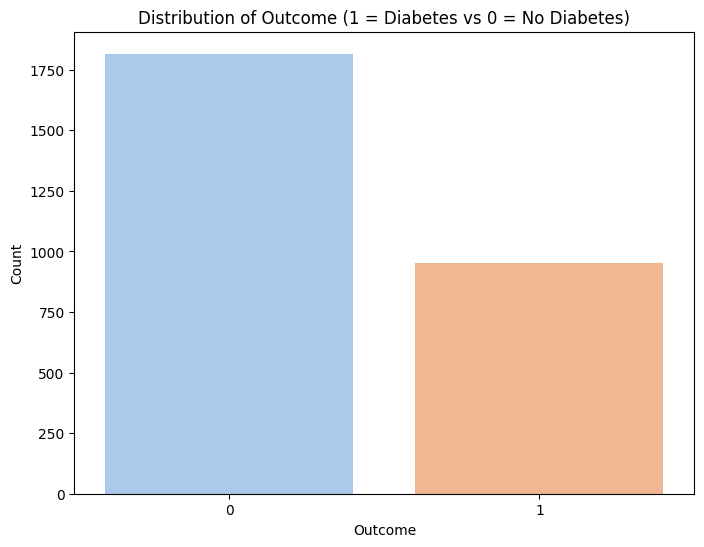

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df_clean, palette='pastel')
plt.title('Distribution of Outcome (1 = Diabetes vs 0 = No Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Correlation Anslysis

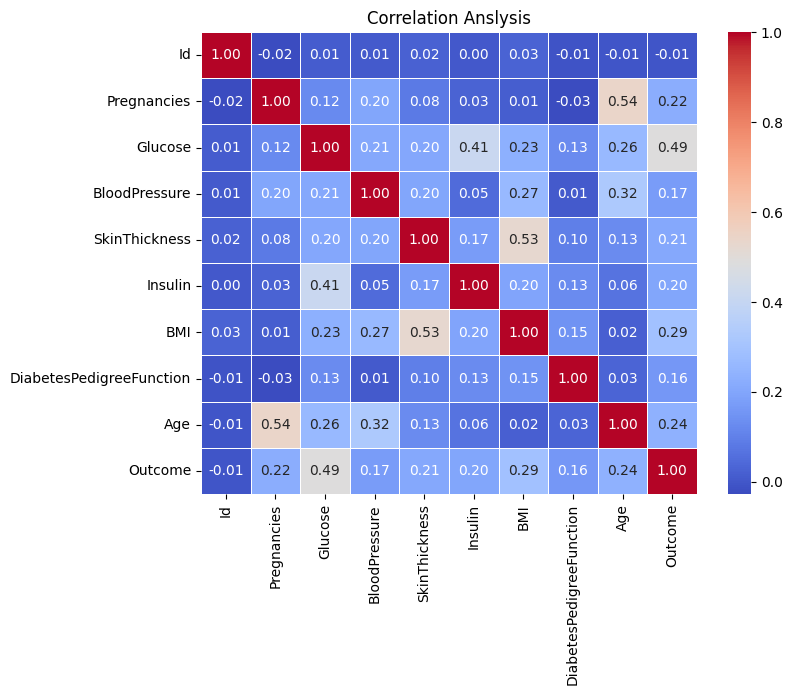

In [ ]:
correlation_matrix = df_clean.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Anslysis')
plt.show()

<Figure size 1200x1000 with 0 Axes>

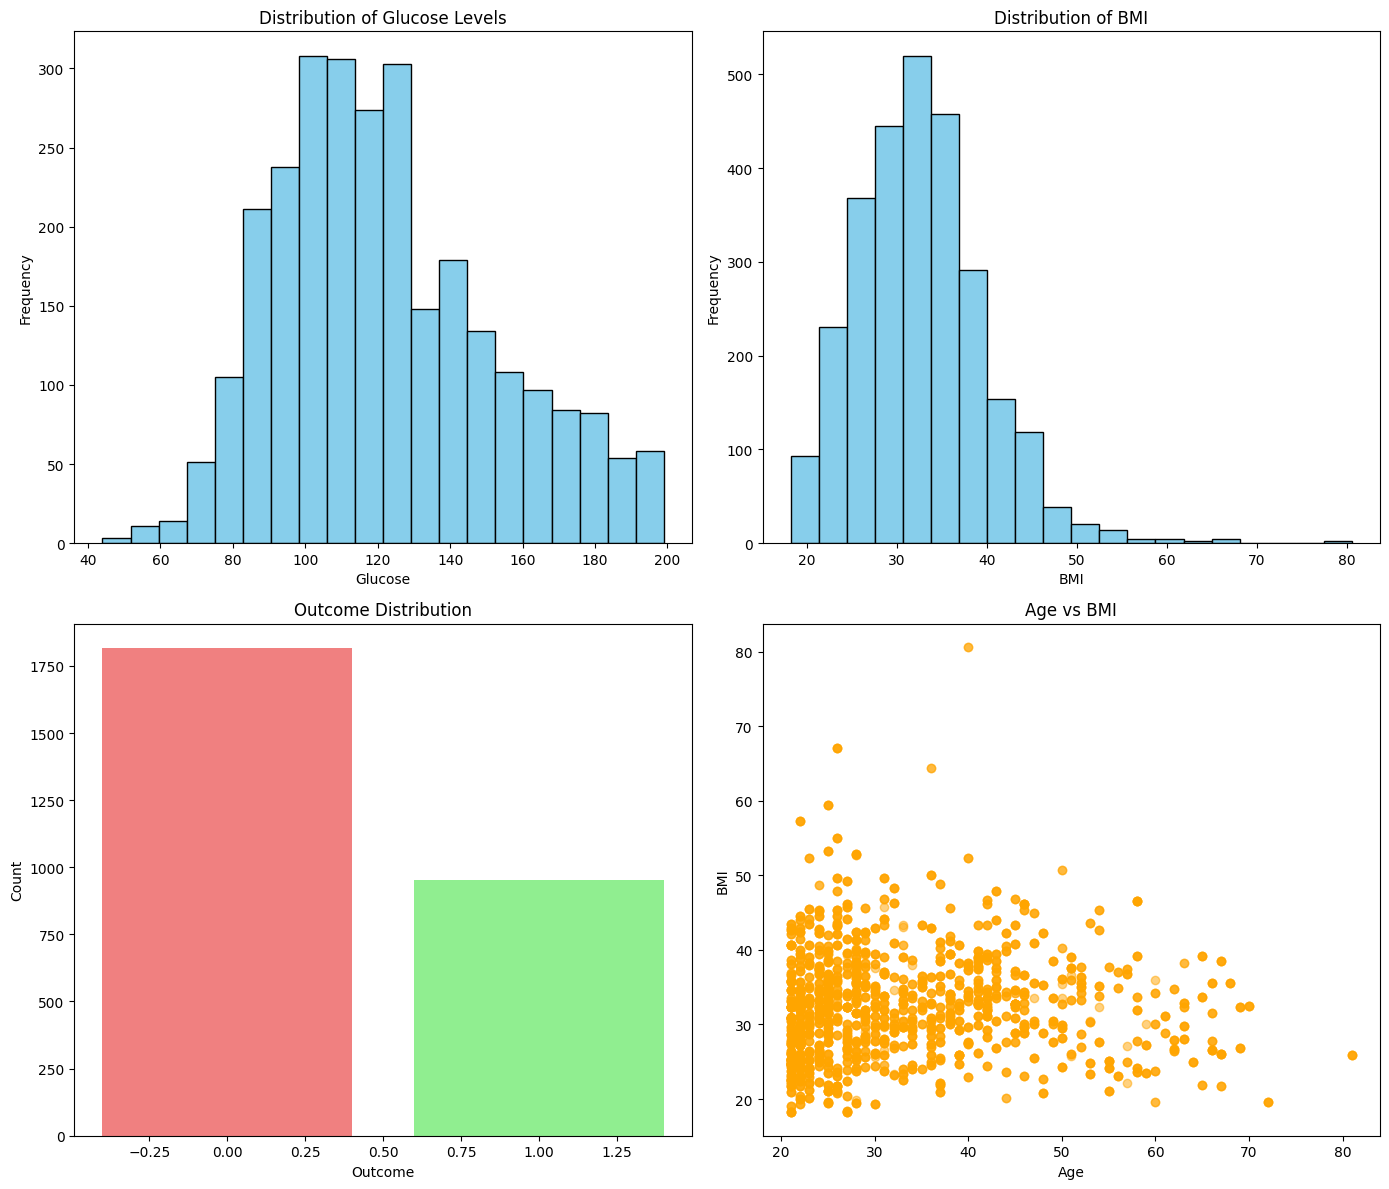

In [ ]:
# Set up the plotting environment
plt.figure(figsize=(12, 10))

# Plot distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Histogram for Glucose
axes[0, 0].hist(df_clean['Glucose'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Glucose Levels')
axes[0, 0].set_xlabel('Glucose')
axes[0, 0].set_ylabel('Frequency')

# Histogram for BMI
axes[0, 1].hist(df_clean['BMI'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Distribution of BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Bar plot for Glucose vs Outcome (target variable)
axes[1, 0].bar(df_clean['Outcome'].value_counts().index, df_clean['Outcome'].value_counts(), color=['lightcoral', 'lightgreen'])
axes[1, 0].set_title('Outcome Distribution')
axes[1, 0].set_xlabel('Outcome')
axes[1, 0].set_ylabel('Count')

# Scatter plot for Age vs BMI (example feature relationship)
axes[1, 1].scatter(df_clean['Age'], df_clean['BMI'], color='orange', alpha=0.5)
axes[1, 1].set_title('Age vs BMI')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

# Split the data into features (X) and target (y)

In [ ]:
X = df_clean.drop(columns=['Id', 'Outcome'])
y = df_clean['Outcome']

# Split the data into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initializing the Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000)

### Train the model

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predictions

In [ ]:
logreg_pred = logreg.predict(X_test)

### Confusion Matrix and Classification Report for Logistic Regression

Text(70.72222222222221, 0.5, 'Actual')

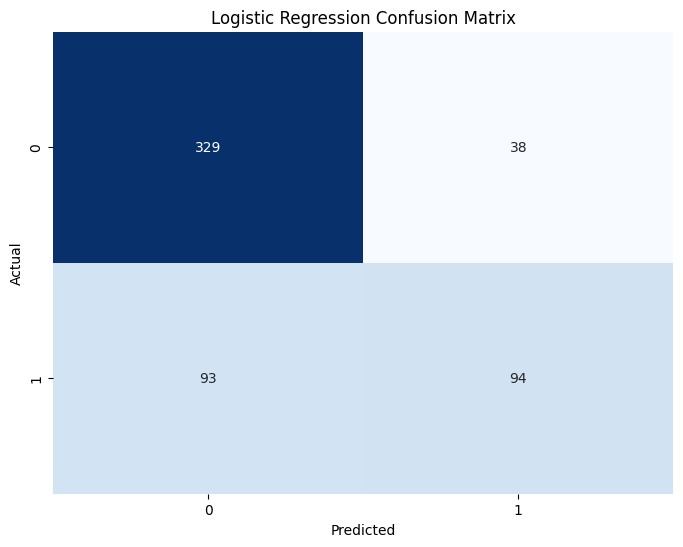

In [ ]:
logreg_cm = confusion_matrix(y_test, logreg_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [ ]:
print(f"\n Classification Report:")
print(classification_report(y_test, logreg_pred, target_names=['No Diabetes', 'Diabetes']))


 Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.90      0.83       367
    Diabetes       0.71      0.50      0.59       187

    accuracy                           0.76       554
   macro avg       0.75      0.70      0.71       554
weighted avg       0.76      0.76      0.75       554



### Initializing the Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

### Train the models

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [ ]:
rf_pred = rf_classifier.predict(X_test)

### Confusion Matrix and Classification Report for Random Forest Classifier

Text(70.72222222222221, 0.5, 'Actual')

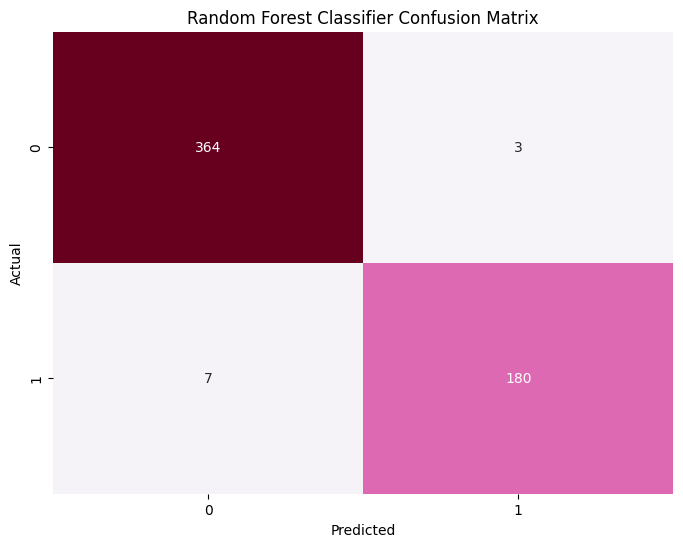

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='PuRd', ax=ax, cbar=False)
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [ ]:
print(f"\n Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['No Diabetes', 'Diabetes']))


 Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.98      0.99      0.99       367
    Diabetes       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



# Comparison Bar Plot for Accuracy

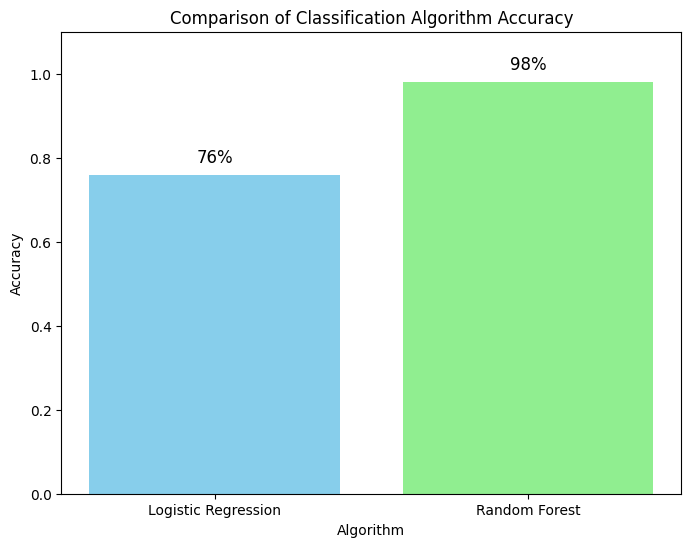

In [ ]:
# Comparison Bar Plot for Accuracy
accuracy_data = {'Logistic Regression': 0.76, 'Random Forest': 0.98}

# Algorithms and their corresponding accuracies
algorithms = list(accuracy_data.keys())
accuracies = list(accuracy_data.values())

# Plot comparison bar plot for accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, accuracies, color=['skyblue', 'lightgreen'])

# Add the accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{accuracy*100:.0f}%', ha='center', va='bottom', fontsize=12)

plt.title('Comparison of Classification Algorithm Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.show()

